## 単回帰分析
傾きaを求める式
$$
\begin{align}
a=\frac{\sum_{n=1}^{N}x_ny_n}{\sum_{n=1}^{N}x_n^2}
\end{align}
$$

サンプルデータ

|x|y|
|---|---|
|1|2|
|2|3.9|
|3|6.1|


### numpy:数値の扱い

In [6]:
import numpy as np

In [7]:
# ベクトルの定義
x = np.array([1,2,3])

In [8]:
x

array([1, 2, 3])

In [10]:
y = np.array([2,3.9,6.1])
y

array([2. , 3.9, 6.1])

In [11]:
#データの中心化
#平均の算出
x.mean()

2.0

In [12]:
y.mean()

4.0

In [13]:
#中心化
xc = x - x.mean()
xc

array([-1.,  0.,  1.])

In [14]:
yc = y - y.mean()
yc

array([-2. , -0.1,  2.1])

In [15]:
# パラメータaの計算

In [22]:
# 要素ごとの掛け算（要素積）
xx = xc * xc

In [23]:
xy = xc * yc

In [24]:
xx.sum()

2.0

In [25]:
xy.sum()

4.1

In [26]:
a = xy.sum()/xx.sum()
a

2.05

## Pandas: データベース操作

In [1]:
import pandas as pd

In [2]:
#CSVファイルの読み込み
df = pd.read_csv('sample.csv')

In [5]:
df.head(3)

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0


In [7]:
#データ抽出
x = df['x']
y = df['y']

## Mapplotlib: グラフ描画

In [10]:
import matplotlib.pyplot as plt

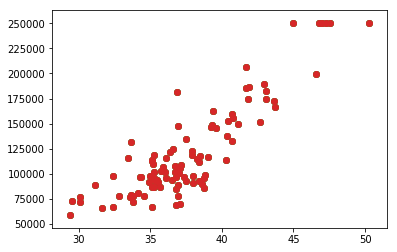

In [14]:
# 横軸をx, 縦軸をyの散布図(scatter)をプロット
plt.scatter(x,y)
plt.show()

# 単回帰分析の実装

## データの中心化

In [15]:
# データの概要を表示
df.describe()

,x,y
count,100.000000,100.000000
mean,37.622220,121065.000000
std,4.087547,47174.009226
min,29.418000,59000.000000
25%,35.151000,90375.000000
50%,36.909000,104250.000000
75%,39.439500,147250.000000
max,50.250000,250000.000000


In [17]:
df.mean()

x        37.62222
y    121065.00000
dtype: float64

In [19]:
# 中心化
df_c = df - df.mean()
df_c.head(3)

,x,y
0,2.73978,16435.0
1,3.06378,11435.0
2,0.80778,-28065.0


In [20]:
df_c.describe()

,x,y
count,1.000000e+02,100.000000
mean,1.989520e-15,0.000000
std,4.087547e+00,47174.009226
min,-8.204220e+00,-62065.000000
25%,-2.471220e+00,-30690.000000
50%,-7.132200e-01,-16815.000000
75%,1.817280e+00,26185.000000
max,1.262778e+01,128935.000000


In [21]:
# データの抽出
x = df_c['x']
y = df_c['y']

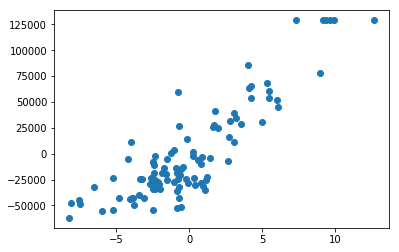

In [22]:
# xとyの散布図をプロット
plt.scatter(x, y)
plt.show()

## パラメータaの計算
傾きaを求める式
$$
\begin{align}
a=\frac{\sum_{n=1}^{N}x_ny_n}{\sum_{n=1}^{N}x_n^2}
\end{align}
$$

In [23]:
xx = x * x # *は要素積
xy = x * y

In [28]:
# 傾き
a = xy.sum()/xx.sum()

In [29]:
a

10069.022519284064

## プロットして確認
予測値の計算方法（中心化した後であれば）
$$
\hat{y} = ax
$$

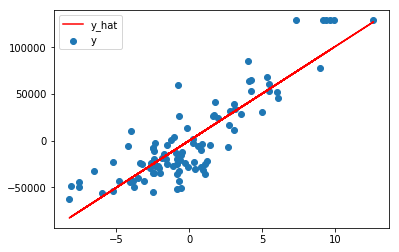

In [33]:
plt.scatter(x, y, label='y') # 実装口
plt.plot(x, a*x, label='y_hat', color='red') # 予測値
plt.legend() # 凡例の表示
plt.show()

## 予測値の計算
中心化されているので、中心化される前の状態に戻す
$$
\begin{align}
y - {\bar y} &=a (x-{\bar x})\\
\rightarrow y &=a(x-{\bar x})+{\bar y}
\end{align}
$$

In [35]:
x_new = 40 # 40平米の部屋

In [37]:
mean = df.mean()
mean['x']

37.62222

In [39]:
# 中心化
xc = x_new - mean['x']
xc

2.3777800000000013

In [42]:
# 単回帰分析による予測 上の式(これは中心化した後のモデル)
yc = a * xc
yc

23941.920365903276

In [45]:
y_hat = a * xc + mean['y'] # 下の式
y_hat # 予測値



145006.92036590326

## 予測値を計算する関数の作成

In [46]:
def predict(x):
    #定数項
    a = 10069.022519284064
    xm = 37.62222
    ym = 121065.0
    # 中心化
    xc = x - xm
    # 予測値の計算
    y_hat = a * xc + ym
    return y_hat

In [47]:
# 予測値
predict(40)

145006.92036590326

In [49]:
predict(30)

44316.69517306263